# Julia examples for week 2 - linear systems

## Make an interpolating polynomial

In [1]:
N = 5
t = range(0, 2*pi, length = N)
y = sin.(t)
V = hcat( [t .^ i for i in 0:N-1]...) # How does this work? evaluate just the expression in the square brackets first

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0         0.0
 1.0  1.5708    2.4674    3.87578     6.08807
 1.0  3.14159   9.8696   31.0063     97.4091
 1.0  4.71239  22.2066  104.646     493.134
 1.0  6.28319  39.4784  248.05     1558.55

In [2]:
# loop to make V
V = zeros(Float64, N, N)
for i in 1:N
    V[:, i] = t .^ (i-1)
end
# list comprehension to make a vector, then reshape to a matrix
V = reshape([ t[j] ^ (i-1) for i in 1:N for j in 1:N ], N, N) # fills down columns first
# double loop makes a matrix without reshaping - loop over rows first; not obvious which index is rows and which is columns; guess and check
V = [ t[j] ^ (i-1) for j in 1:N, i in 1:N ]

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0         0.0
 1.0  1.5708    2.4674    3.87578     6.08807
 1.0  3.14159   9.8696   31.0063     97.4091
 1.0  4.71239  22.2066  104.646     493.134
 1.0  6.28319  39.4784  248.05     1558.55

In [3]:
# Solve Vc = y
c = V\y # coefficients using Julia's built-in solve linear system method ("magic")
    

5-element Vector{Float64}:
  0.0
  1.6976527263135497
 -0.8105694691387021
  0.08600409182186533
 -3.0393412985450275e-18

In [4]:
using Polynomials
p = Polynomial(c)

Polynomial(1.6976527263135497*x - 0.8105694691387021*x^2 + 0.08600409182186533*x^3 - 3.0393412985450275e-18*x^4)

In [5]:
p(pi)

-6.681301346009717e-16

In [6]:
"""
    horner(c,x)

Evaluate a polynomial whose coefficients are given in ascending
order in `c`, at the point `x`, using Horner's rule.
"""
function horner(c,x)
    n = length(c)
    y = c[n]
    for k in n-1:-1:1
        y = x*y + c[k]
    end
    return y
end
p = x -> horner(c, x)

#9 (generic function with 1 method)

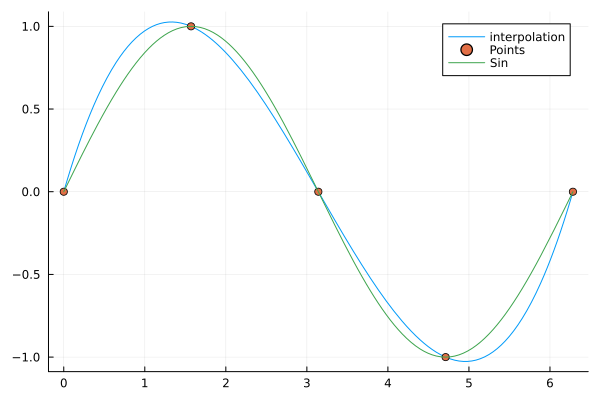

In [7]:
using Plots
plot(p, 0, 2*pi, label = "interpolation")
scatter!(t, y, label = "Points")
plot!(sin, 0, 2*pi, label = "Sin")

## Forward and backsubstitution

From textbook section [2.3](https://tobydriscoll.net/fnc-julia/linsys/linear-systems.html)

In [8]:
"""
    forwardsub(L,b)

Solve the lower triangular linear system with matrix `L` and
right-hand side vector `b`.
"""
function forwardsub(L,b)
    n = size(L,1)
    x = zeros(n)
    x[1] = b[1]/L[1,1]
    for i in 2:n
        s = sum( L[i,j]*x[j] for j in 1:i-1 )
        x[i] = ( b[i] - s ) / L[i,i]
    end
    return x
end

"""
    backsub(U,b)

Solve the upper triangular linear system with matrix `U` and
right-hand side vector `b`.
"""
function backsub(U,b)
    n = size(U,1)
    x = zeros(n)
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        s = sum( U[i,j]*x[j] for j in i+1:n )
        x[i] = ( b[i] - s ) / U[i,i]
    end
    return x
end

backsub

In [9]:
using LinearAlgebra
L = LowerTriangular(rand(Float64, 3, 3)) # compare tril(rand(Float64, 3, 3)) # could use UnitLowerTriangular
U = UpperTriangular(rand(Float64, 3, 3)) # compare triu(rand(Float64, 3, 3))
L[diagind(L)] = ones(3) # Make L have 1s on the diagonal
b = [1, 2, 3];
A = L * U; # Matrix product

In [10]:
L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
 1.0        ⋅         ⋅ 
 0.364642  1.0        ⋅ 
 0.987148  0.388242  1.0

In [11]:
U

3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.507625  0.521717  0.957415
  ⋅        0.751643  0.292606
  ⋅         ⋅        0.0916749

In [12]:
A

3×3 Matrix{Float64}:
 0.507625  0.521717  0.957415
 0.185101  0.941883  0.641719
 0.501101  0.806831  1.15039

Solve Ax = b by writing A = LU and solving LUx = b. 
Solve this in two steps: Lz = b then Ux = z.
Compare with solution to Ax = b.

In [13]:
z = forwardsub(L, b) # solve Lz=b

3-element Vector{Float64}:
 1.0
 1.6353581711587823
 1.3779364368750149

In [14]:
L\b # check with Julia's built-in solve

3-element Vector{Float64}:
 1.0
 1.6353581711587823
 1.377936436875015

In [15]:
x = backsub(U, z)

3-element Vector{Float64}:
 -22.601355184727353
  -3.67555405581698
  15.030684499155337

In [16]:
U\z # check

3-element Vector{Float64}:
 -22.601355184727353
  -3.67555405581698
  15.030684499155337

In [17]:
A\b

3-element Vector{Float64}:
 -22.601355184727396
  -3.675554055816991
  15.030684499155365

In [18]:
L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
 1.0        ⋅         ⋅ 
 0.364642  1.0        ⋅ 
 0.987148  0.388242  1.0

In [19]:
U

3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.507625  0.521717  0.957415
  ⋅        0.751643  0.292606
  ⋅         ⋅        0.0916749

In [20]:
sizeof(A), sizeof(L), sizeof(U)  # 8 x 3 x 3 for A; confusing for L, U

(72, 8, 8)

In [21]:
Base.summarysize.((A, L, U)) # full storage requirements; 40 bytes of overhead for each, plus extra storage for Lower and UpperTriangular; does not save space

(112, 120, 120)

In [22]:
F = lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.364642  1.0       0.0
 0.987148  0.388242  1.0
U factor:
3×3 Matrix{Float64}:
 0.507625  0.521717  0.957415
 0.0       0.751643  0.292606
 0.0       0.0       0.0916749

In [23]:
F.p # see also F.P, F.L, F.U

3-element Vector{Int64}:
 1
 2
 3

Inner and outer products of vectors

In [24]:
x = [1, 5, 9, -1]

4-element Vector{Int64}:
  1
  5
  9
 -1

In [25]:
y = [-1 3 0 2]

1×4 Matrix{Int64}:
 -1  3  0  2

In [26]:
x * y # outer product

4×4 Matrix{Int64}:
 -1   3  0   2
 -5  15  0  10
 -9  27  0  18
  1  -3  0  -2

In [27]:
y * x # inner (dot) product

1-element Vector{Int64}:
 12

In [28]:
x'x

108

In [29]:
y * y'

1×1 Matrix{Int64}:
 14

Return to polynomial fitting example. Can we find an LU decomposition for V?

In [30]:
V

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0         0.0
 1.0  1.5708    2.4674    3.87578     6.08807
 1.0  3.14159   9.8696   31.0063     97.4091
 1.0  4.71239  22.2066  104.646     493.134
 1.0  6.28319  39.4784  248.05     1558.55

In [31]:
V_lu = lu(V)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
5×5 Matrix{Float64}:
 1.0  0.0   0.0    0.0  0.0
 1.0  1.0   0.0    0.0  0.0
 1.0  0.5   1.0    0.0  0.0
 1.0  0.75  0.75   1.0  0.0
 1.0  0.25  0.75  -1.0  1.0
U factor:
5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0        0.0
 0.0  6.28319  39.4784  248.05    1558.55
 0.0  0.0      -9.8696  -93.0188  -681.864
 0.0  0.0       0.0     -11.6274  -164.378
 0.0  0.0       0.0       0.0      -36.5284

In [32]:
V_lu.P

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0

In [33]:
@show V \ y
backsub(V_lu.U, forwardsub(V_lu.L, V_lu.P * y))

LoadError: DimensionMismatch: arguments must have the same number of rows

Check function in book

In [34]:
function plufact(A)
    n = size(A,1)
    L = zeros(n,n)
    U = zeros(n,n)
    p = fill(0,n)
    Aₖ = float(copy(A))

    # Reduction by outer products
    for k in 1:n-1
        p[k] = argmax(abs.(Aₖ[:,k]))
        U[k,:] = Aₖ[p[k],:]
        L[:,k] = Aₖ[:,k]/U[k,k]
        Aₖ -= L[:,k]*U[k,:]'
    end
    p[n] = argmax(abs.(Aₖ[:,n]))
    U[n,n] = Aₖ[p[n],n]
    L[:,n] = Aₖ[:,n]/U[n,n]
    return LowerTriangular(L[p,:]),U,p
end

plufact (generic function with 1 method)

In [35]:
L1, U1, P1 = plufact(V)

([1.0 0.0 … 0.0 0.0; 1.0 1.0 … 0.0 0.0; … ; 1.0 0.75 … 1.0 0.0; 1.0 0.25 … -0.9999999999999993 1.0], [1.0 0.0 … 0.0 0.0; 0.0 6.283185307179586 … 248.05021344239853 1558.5454565440386; … ; 0.0 0.0 … -11.627353755112438 -164.37784111987906; 0.0 0.0 … 0.0 -36.528409137750714], [1, 5, 3, 4, 2])

In [36]:
L1

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 1.0   ⋅     ⋅      ⋅    ⋅ 
 1.0  1.0    ⋅      ⋅    ⋅ 
 1.0  0.5   1.0     ⋅    ⋅ 
 1.0  0.75  0.75   1.0   ⋅ 
 1.0  0.25  0.75  -1.0  1.0

In [37]:
U1

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0        0.0
 0.0  6.28319  39.4784  248.05    1558.55
 0.0  0.0      -9.8696  -93.0188  -681.864
 0.0  0.0       0.0     -11.6274  -164.378
 0.0  0.0       0.0       0.0      -36.5284

In [38]:
P1

5-element Vector{Int64}:
 1
 5
 3
 4
 2

## Norms and matrix condition number

See help:

* https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.norm
* https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.opnorm

In [39]:
b

3-element Vector{Int64}:
 1
 2
 3

In [40]:
norm(b)

3.7416573867739413

In [41]:
sqrt(b'b)

3.7416573867739413

In [42]:
norm(b, 1)

6.0

In [43]:
norm(b, Inf)

3.0

In [44]:
A

3×3 Matrix{Float64}:
 0.507625  0.521717  0.957415
 0.185101  0.941883  0.641719
 0.501101  0.806831  1.15039

In [45]:
norm(A), opnorm(A) # operator norm is the matrix norm; norm is vector norm

(2.2372293691614695, 2.1907713532908053)

In [46]:
sqrt(sum(A .^ 2))

2.2372293691614695

In [47]:
F = svd(A) # The Singular Value Decomposition appears in chapter 7
maximum(F.S) # Largest "singular value"

2.190771353290806

In [48]:
norm(A, Inf), opnorm(A, Inf)

(1.1503876667713302, 2.4583198966545097)

In [49]:
maximum(A), maximum([ sum(abs.(A[i,:])) for i in 1:size(A,1)]) # row sums

(1.1503876667713302, 2.4583198966545097)

In [50]:
norm(A,1), opnorm(A, 1)

(6.213780113326673, 2.7495224600971495)

In [51]:
sum(abs.(A)), maximum([ sum(abs.(A[:,i])) for i in 1:size(A,2)]) # column sums

(6.213780113326673, 2.7495224600971495)

In [52]:
cond(A, 2 )

62.044496157585066

In [53]:
A * inv(A)

3×3 Matrix{Float64}:
  1.0          0.0          0.0
 -8.88178e-16  1.0          0.0
  0.0          8.88178e-16  1.0

In [54]:
opnorm(A, 2) * opnorm(inv(A), 2)

62.04449615758517

In [55]:
cond(A, 1), opnorm(A, 1) * opnorm(inv(A), 1)

(86.23513668762268, 86.23513668762268)

In [56]:
D = [ 1/(1+i+j) for i in 1:9, j in 1:9 ] # Hilbert matrix
# D = reshape([ 1/(1+i+j) for i in 1:9 for j in 1:9 ], 9, 9)

9×9 Matrix{Float64}:
 0.333333   0.25       0.2        …  0.111111   0.1        0.0909091
 0.25       0.2        0.166667      0.1        0.0909091  0.0833333
 0.2        0.166667   0.142857      0.0909091  0.0833333  0.0769231
 0.166667   0.142857   0.125         0.0833333  0.0769231  0.0714286
 0.142857   0.125      0.111111      0.0769231  0.0714286  0.0666667
 0.125      0.111111   0.1        …  0.0714286  0.0666667  0.0625
 0.111111   0.1        0.0909091     0.0666667  0.0625     0.0588235
 0.1        0.0909091  0.0833333     0.0625     0.0588235  0.0555556
 0.0909091  0.0833333  0.0769231     0.0588235  0.0555556  0.0526316

In [57]:
cond(D,1), cond(D,2), cond(D, Inf)

(1.3500941871102945e13, 7.074884363213305e12, 1.3500941849243812e13)

In [58]:
x = 1:9
b = D*x  
@show D\b;

D \ b = [0.9999999433175111, 2.0000016474021156, 2.99998282217313, 4.000088837058358, 4.999742041095961, 6.000440584375426, 6.9995607915434945, 8.000236397072145, 8.999946934790987]


In [59]:
Δx = D\b - x
@show relative_error = norm(Δx) / norm(x);

relative_error = norm(Δx) / norm(x) = 4.273339489778937e-5


In [60]:
S = A .+ A'

3×3 Matrix{Float64}:
 1.01525   0.706818  1.45852
 0.706818  1.88377   1.44855
 1.45852   1.44855   2.30078

In [61]:
Symmetric(S)

3×3 Symmetric{Float64, Matrix{Float64}}:
 1.01525   0.706818  1.45852
 0.706818  1.88377   1.44855
 1.45852   1.44855   2.30078

In [62]:
factorize(Symmetric(S))  # LDL^T with pivoting

BunchKaufman{Float64, Matrix{Float64}, Vector{Int64}}
D factor:
3×3 Tridiagonal{Float64, Vector{Float64}}:
 0.0446502  0.0        ⋅ 
 0.0        0.971769  0.0
  ⋅         0.0       2.30078
U factor:
3×3 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -0.217596  0.633924
  ⋅    1.0       0.629592
  ⋅     ⋅        1.0
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [63]:
SymTridiagonal(S)

3×3 SymTridiagonal{Float64, Vector{Float64}}:
 1.01525   0.706818   ⋅ 
 0.706818  1.88377   1.44855
  ⋅        1.44855   2.30078

In [64]:
ldlt(SymTridiagonal(S)) # S = LDL^T

LDLt{Float64, SymTridiagonal{Float64, Vector{Float64}}}
L factor:
3×3 UnitLowerTriangular{Float64, SymTridiagonal{Float64, Vector{Float64}}}:
 1.0        ⋅        ⋅ 
 0.696201  1.0       ⋅ 
 0.0       1.04087  1.0
D factor:
3×3 Diagonal{Float64, Vector{Float64}}:
 1.01525   ⋅        ⋅ 
  ⋅       1.39168   ⋅ 
  ⋅        ⋅       0.793028

In [65]:
isposdef(S) # possible, but not guaranteed

true

In [66]:
SPD = A' * A

3×3 Matrix{Float64}:
 0.543048  0.843484  1.18125
 0.843484  1.81031   2.03209
 1.18125   2.03209   2.65184

In [67]:
C = cholesky(SPD)

Cholesky{Float64, Matrix{Float64}}
U factor:
3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.736918  1.14461  1.60296
  ⋅        0.70723  0.27901
  ⋅         ⋅       0.0671159

In [68]:
C.L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
 0.736918   ⋅        ⋅ 
 1.14461   0.70723   ⋅ 
 1.60296   0.27901  0.0671159

In [69]:
C.L * C.L'

3×3 Matrix{Float64}:
 0.543048  0.843484  1.18125
 0.843484  1.81031   2.03209
 1.18125   2.03209   2.65184

In [70]:
C.L * C.U

3×3 Matrix{Float64}:
 0.543048  0.843484  1.18125
 0.843484  1.81031   2.03209
 1.18125   2.03209   2.65184

Exact calculation of inverse of Hilbert matrix

In [71]:
k = 9 # Can't be done with In64 for k = 14
D = [ 1 // (1+i+j) for i in 1:k, j in 1:k ] # Hilbert matrix
inv(D)

9×9 Matrix{Rational{Int64}}:
      81675//1     -1960200//1  …      -173281680//1       37413090//1
   -1960200//1     50181120//1         5040921600//1    -1097450640//1
   17837820//1   -475675200//1       -52562109600//1    11523231720//1
  -83243160//1   2283240960//1       271705674240//1   -59920804944//1
  222972750//1  -6243237000//1      -788431644000//1   174769014420//1
 -356756400//1  10147737600//1  …   1345590005760//1  -299604024720//1
  336936600//1  -9703774080//1     -1340333794800//1   299604024720//1
 -173281680//1   5040921600//1       720851788800//1  -161691060960//1
   37413090//1  -1097450640//1      -161691060960//1    36380488716//1

## Summary

* create column, row vectors
* create matrix by combining vectors, from a function and pair of loops
* zeros, ones
* diagm, tril, triu, UpperTriangular, LowerTriangular
* rand (scalar, vector, matrix)
* matrix, vector multiply
* transpose ' (adjoint = complex conjugate transpose)
* solve \
* scalar multiply (broadcasting with .)
* subsetting (indexes, :)